## Deep Learning document parser
using **UNSTRUCTURED** framework

**Pre-Challenge** : Install UNSTRUCTURED package with all file & connector types

In [0]:
# !pip install "unstructured[all-docs]"
# !sudo apt-get -y install poppler-utils
!pip install pdf2image
!pip install unstructured
!pip install pdfminer.six
!pip install pillow-heif
!pip install opencv-python
!pip install pikepdf pypdf
!pip install unstructured[all-docs]
!apt-get install -y poppler-utils
!pip install layoutparser[ocr]
!pip install pillow==9.4.0
!apt-get -y install tesseract-ocr-*
!pip install camelot-py[all]
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 
!apt install -y build-essential libpoppler-cpp-dev pkg-config python3-dev
!pip install tabula-py==2.7.0

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.r

In [0]:
dbutils.library.restartPython()

**Challenge #1** : Extract data from tables and images from the PDF document

In [0]:
from unstructured.partition.pdf import partition_pdf
from unstructured.partition.image import partition_image

filename = "./purchasing_contract_example.pdf"
titles = []
texts = []
tables = []
uncategorized = []
#infer_table_structure=True automatically selects hi_res strategy
elements = partition_pdf(filename=filename, infer_table_structure=True)

for e in elements: 
    if e.category == 'Title':
        titles.append(e)
    elif e.category == 'Table':
        tables.append(e)
    elif e.category == 'NarrativeText':
        texts.append(e)
    else:
        uncategorized.append(e)



In [0]:
uncategorized = [e for e in elements if e.category=='UncategorizedText']
uncategorized[0].metadata.text_as_html

4


Title
Title
NarrativeText
NarrativeText
Title
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
ListItem
NarrativeText
Title
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
Image
Title
NarrativeText
Title
Title
NarrativeText
NarrativeText
Title
Title
Title
NarrativeText
Title
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
NarrativeText
UncategorizedText
Title
NarrativeText
NarrativeText
ListItem
NarrativeText
Title
Title
Title
ListItem
NarrativeText
NarrativeText
NarrativeText
NarrativeText
ListItem
NarrativeText
NarrativeText
NarrativeText
Title
Title
Title
NarrativeText
Table
NarrativeText
Table
Title
Title
NarrativeText
UncategorizedText
Title
Title
Title
Table
NarrativeText
Table
ListItem
NarrativeText
ListItem
NarrativeText
NarrativeText
ListItem
NarrativeText
Narra

In [0]:

for el in elements:
    if el.category == 'NarrativeText':


In [0]:
import pandas as pd
from tabulate import tabulate

df = pd.read_html(tables[2].metadata.text_as_html)
df = df[0]

for col in df.columns:
    current_value = None
    for i, value in enumerate(df[col]):
        if pd.isnull(value):
            df.at[i, col] = current_value
        else:

            current_value = value


df

/root/.ipykernel/431780/command-633159276057981-2484875532:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(tables[2].metadata.text_as_html)


,clei MMO ee ROUEN,Trigramme,Remise accordée (en %) sur le Rieke,Prix ALC (en % du net PLC)
0,CATIA - MECHANICAL DESIGN 2 Configuration,MD2,None,None
1,CATIA - HYBRID DESIGN 2 Configuration,HD2,None,None
2,DMU KINEMATICS SIMULATOR 2 Product,KIN,None,None
3,DMU SPACE ANALYSIS 2 Product,SPA,None,None
4,CATIA - PRODUCT KNOWLEDGE TEMPLATE 1 Product,KT1,None,None
5,CATIA - 3D FUNCTIONAL TOLERANCING & ANNOTATION...,ET,None,None
6,CATIA - 3D FUNCTIONAL TOLERANCING & ANNOTATION...,FTA,None,20%
7,CATIA - CAST & FORGED PART OPTIMIZER 2 Product,CFO,34% °,°
8,CATIA - STEP CORE INTERFACE 1 Product,sv1,34% °,°
9,CATIA - PPR PDM Gateway 1 Product,PX14,34% °,°


In [0]:
table = tabulate(df,headers=df.columns, tablefmt="plain")
table

'    clei MMO ee ROUEN                                         Trigramme    Remise accordée (en %) sur le Rieke    Prix ALC (en % du net PLC)\n 0  CATIA - MECHANICAL DESIGN 2 Configuration                 MD2\n 1  CATIA - HYBRID DESIGN 2 Configuration                     HD2\n 2  DMU KINEMATICS SIMULATOR 2 Product                        KIN\n 3  DMU SPACE ANALYSIS 2 Product                              SPA\n 4  CATIA - PRODUCT KNOWLEDGE TEMPLATE 1 Product              KT1\n 5  CATIA - 3D FUNCTIONAL TOLERANCING & ANNOTATION 1 Product  ET\n 6  CATIA - 3D FUNCTIONAL TOLERANCING & ANNOTATION 2 Product  FTA                                                 20%\n 7  CATIA - CAST & FORGED PART OPTIMIZER 2 Product            CFO          34% °                                  °\n 8  CATIA - STEP CORE INTERFACE 1 Product                     sv1          34% °                                  °\n 9  CATIA - PPR PDM Gateway 1 Product                         PX14         34% °                       

**Challenge #2** : Rearrange detected blocks (especially for PDF with double-column)

In [0]:
print(elements[6].to_dict())

{'type': 'NarrativeText', 'element_id': '18884d2fc6b147cb7046e2c7c11b244b', 'text': 'DS et le Client Principal ont conclu un Avenant 1 (réf. 02410-2018) au Contrat en date du 10 décembre 2018 et dans lequel les parties ont mis à jour certaines conditions commerciales de l’Annexe 1 « Conditions Spécifiques » relative au Portefeuille de Produits DELMIA Apriso notamment concernant la durée de validité des conditions commerciales.', 'metadata': {'detection_class_prob': 0.9340993762016296, 'coordinates': {'points': ((100.0, 673.388671875), (100.0, 756.3055555555554), (1559.2361111111115, 756.3055555555554), (1559.2361111111115, 673.388671875)), 'system': 'PixelSpace', 'layout_width': 1654, 'layout_height': 2339}, 'last_modified': '2024-03-13T08:42:02', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'parent_id': '8eb8408f965799a71f5516d4f62b6d66', 'file_directory': '.', 'filename': 'purchasing_contract_example.pdf'}}


In [0]:
from unstructured_inference.models.base import get_model
from unstructured_inference.inference.layout import DocumentLayout

model = get_model("yolox")
layout = DocumentLayout.from_file("./purchasing_contract_example.pdf", detection_model=model)
# print(layout.pages[1].elements)

#Statements to reorder the layout extracted
x1_min = min([el.bbox.x1 for el in layout.pages[2].elements])
x2_max = max([el.bbox.x2 for el in layout.pages[2].elements])
mid_line_x_coordinate = (x2_max + x1_min) /  2
left_column = []
right_column = []
for el in layout.pages[2].elements:
    if el.bbox.x1 < mid_line_x_coordinate:
        left_column.append(el)
    else:
        right_column.append(el)

left_column.sort(key = lambda z: z.bbox.y1)
right_column.sort(key = lambda z: z.bbox.y1)
sorted_layout = left_column + right_column
sorted_layout

[LayoutElement(bbox=Rectangle(x1=146.24227905273438, y1=105.28528594970703, x2=1551.281982421875, y2=157.0825653076172), text=None, source=<Source.YOLOX: 'yolox'>, type='List-item', prob=0.8979185819625854, image_path=None, parent=None),
 LayoutElement(bbox=Rectangle(x1=103.58958435058594, y1=189.8278045654297, x2=1552.538330078125, y2=271.9895935058594), text=None, source=<Source.YOLOX: 'yolox'>, type='Text', prob=0.9326726198196411, image_path=None, parent=None),
 LayoutElement(bbox=Rectangle(x1=95.76141357421875, y1=302.0864562988281, x2=1395.2784423828125, y2=330.3262023925781), text=None, source=<Source.YOLOX: 'yolox'>, type='Text', prob=0.8707780241966248, image_path=None, parent=None),
 LayoutElement(bbox=Rectangle(x1=112.33049774169922, y1=361.0355529785156, x2=1556.2320556640625, y2=444.2918395996094), text=None, source=<Source.YOLOX: 'yolox'>, type='Text', prob=0.9331519603729248, image_path=None, parent=None),
 LayoutElement(bbox=Rectangle(x1=107.87611389160156, y1=476.85546

<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x7F2A7C0980D0>


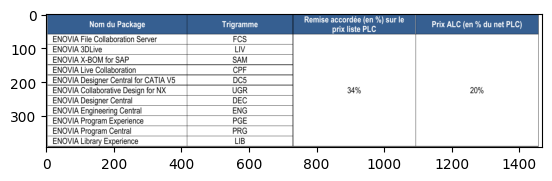

In [0]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Store Pdf with convert_from_path function
images = convert_from_path('./purchasing_contract_example.pdf')[2]
box = (*sorted_layout[13].to_dict()['coordinates'][0],*sorted_layout[13].to_dict()['coordinates'][2])
# box_x1, box_y1 = sorted_layout[13].to_dict()['coordinates'][0]
# box_x2, box_y2 = sorted_layout[13].to_dict()['coordinates'][2]

print(images)
img2 = images.crop(box)
plt.figure()
plt.imshow(img2)

In [0]:
from unstructured.partition.image import partition_image
from tempfile import TemporaryFile
import io

fp = TemporaryFile()
img2.save(fp, format='PNG')
elements_img = partition_image(file=fp, infer_table_structure=True)
fp.close()
elements_img

This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name


In [0]:
print(elements_img[0])

Nom du Package Bie TCuy Remise accordée (en %) sur le Prix ALC (en % du net PLC) ENOVIA File Collaboration Server FCS ENOVIA 3DLive LIV ENOVIA X-BOM for SAP SAM ENOVIA Live Collaboration CPF ENOVIA Designer Central for CATIA V5 DC5 ENOVIA Collaborative Design for NX UGR ENOVIA Designer Central DEC ENOVIA Engineering Central ENG ENOVIA Program Experience PGE ENOVIA Program Central PRG ENOVIA Library Experience LIB prix liste PLC 34% 20%


LAYOUT PARSER

In [0]:
#Convert PDF to Images and save them 
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import os

def pdf_to_png(pdf_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    images = convert_from_path(pdf_path)
    for i, image in enumerate(images):
        image_path = f"{output_path}/page_{i+1}.png"
        image.save(image_path, "PNG")



pdf_path = "./purchasing_contract_example.pdf" 
output_path = "./output"  
pdf_to_png(pdf_path, output_path)

In [0]:
import layoutparser as lp 

import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np
import cv2

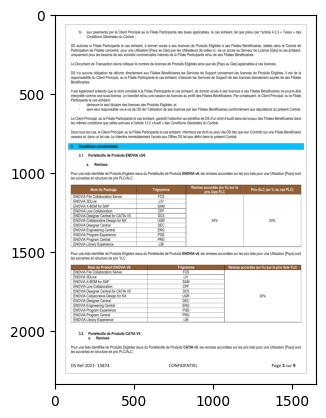

In [0]:
img = cv2.imread("./output/page_3.png")
plt.imshow(img)

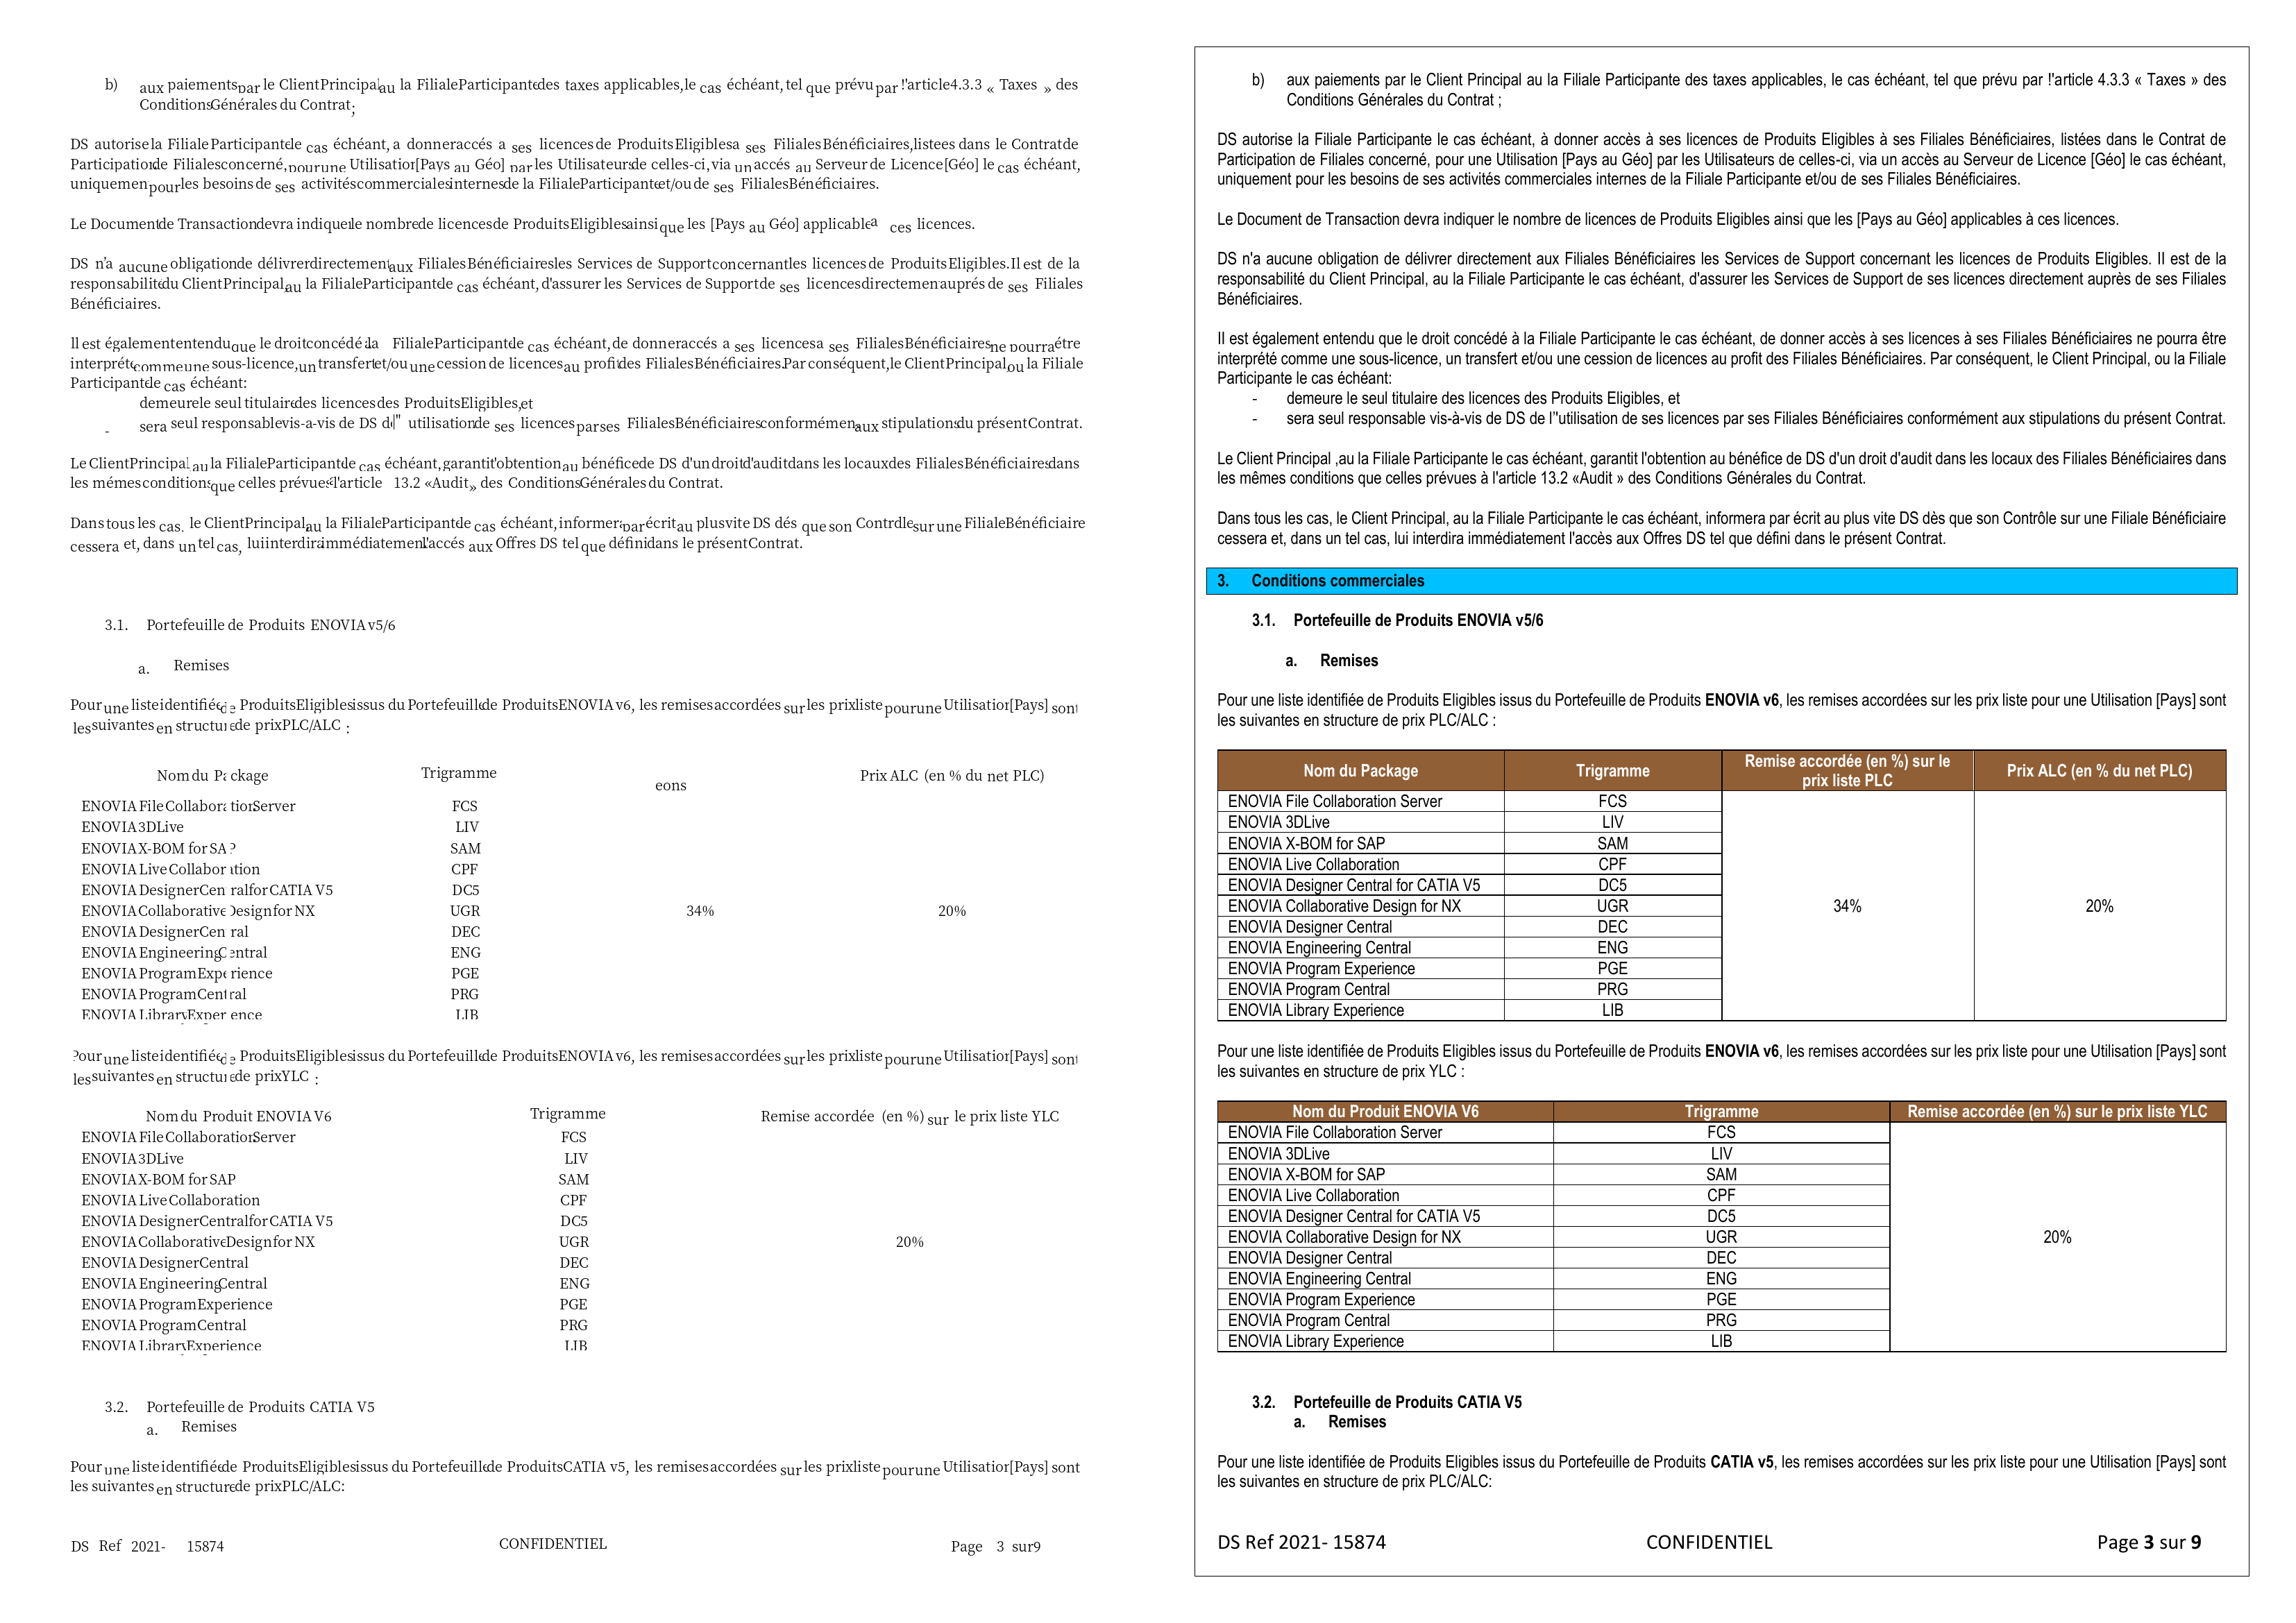

In [0]:
model = lp.TesseractAgent()
res = model.detect(img, return_response=True)
ocr  = model.gather_data(res, lp.TesseractFeatureType(4)) 
lp.draw_text(img, ocr, font_size=20, with_box_on_text=True,text_box_width=1)

In [0]:
model1 = lp.models.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

model2 = lp.models.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

model3 = lp.models.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

model4 = lp.models.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

In [0]:
layout_result1 = model1.detect(img)
layout_result2 = model2.detect(img)
layout_result3 = model3.detect(img)
layout_result4 = model4.detect(img)


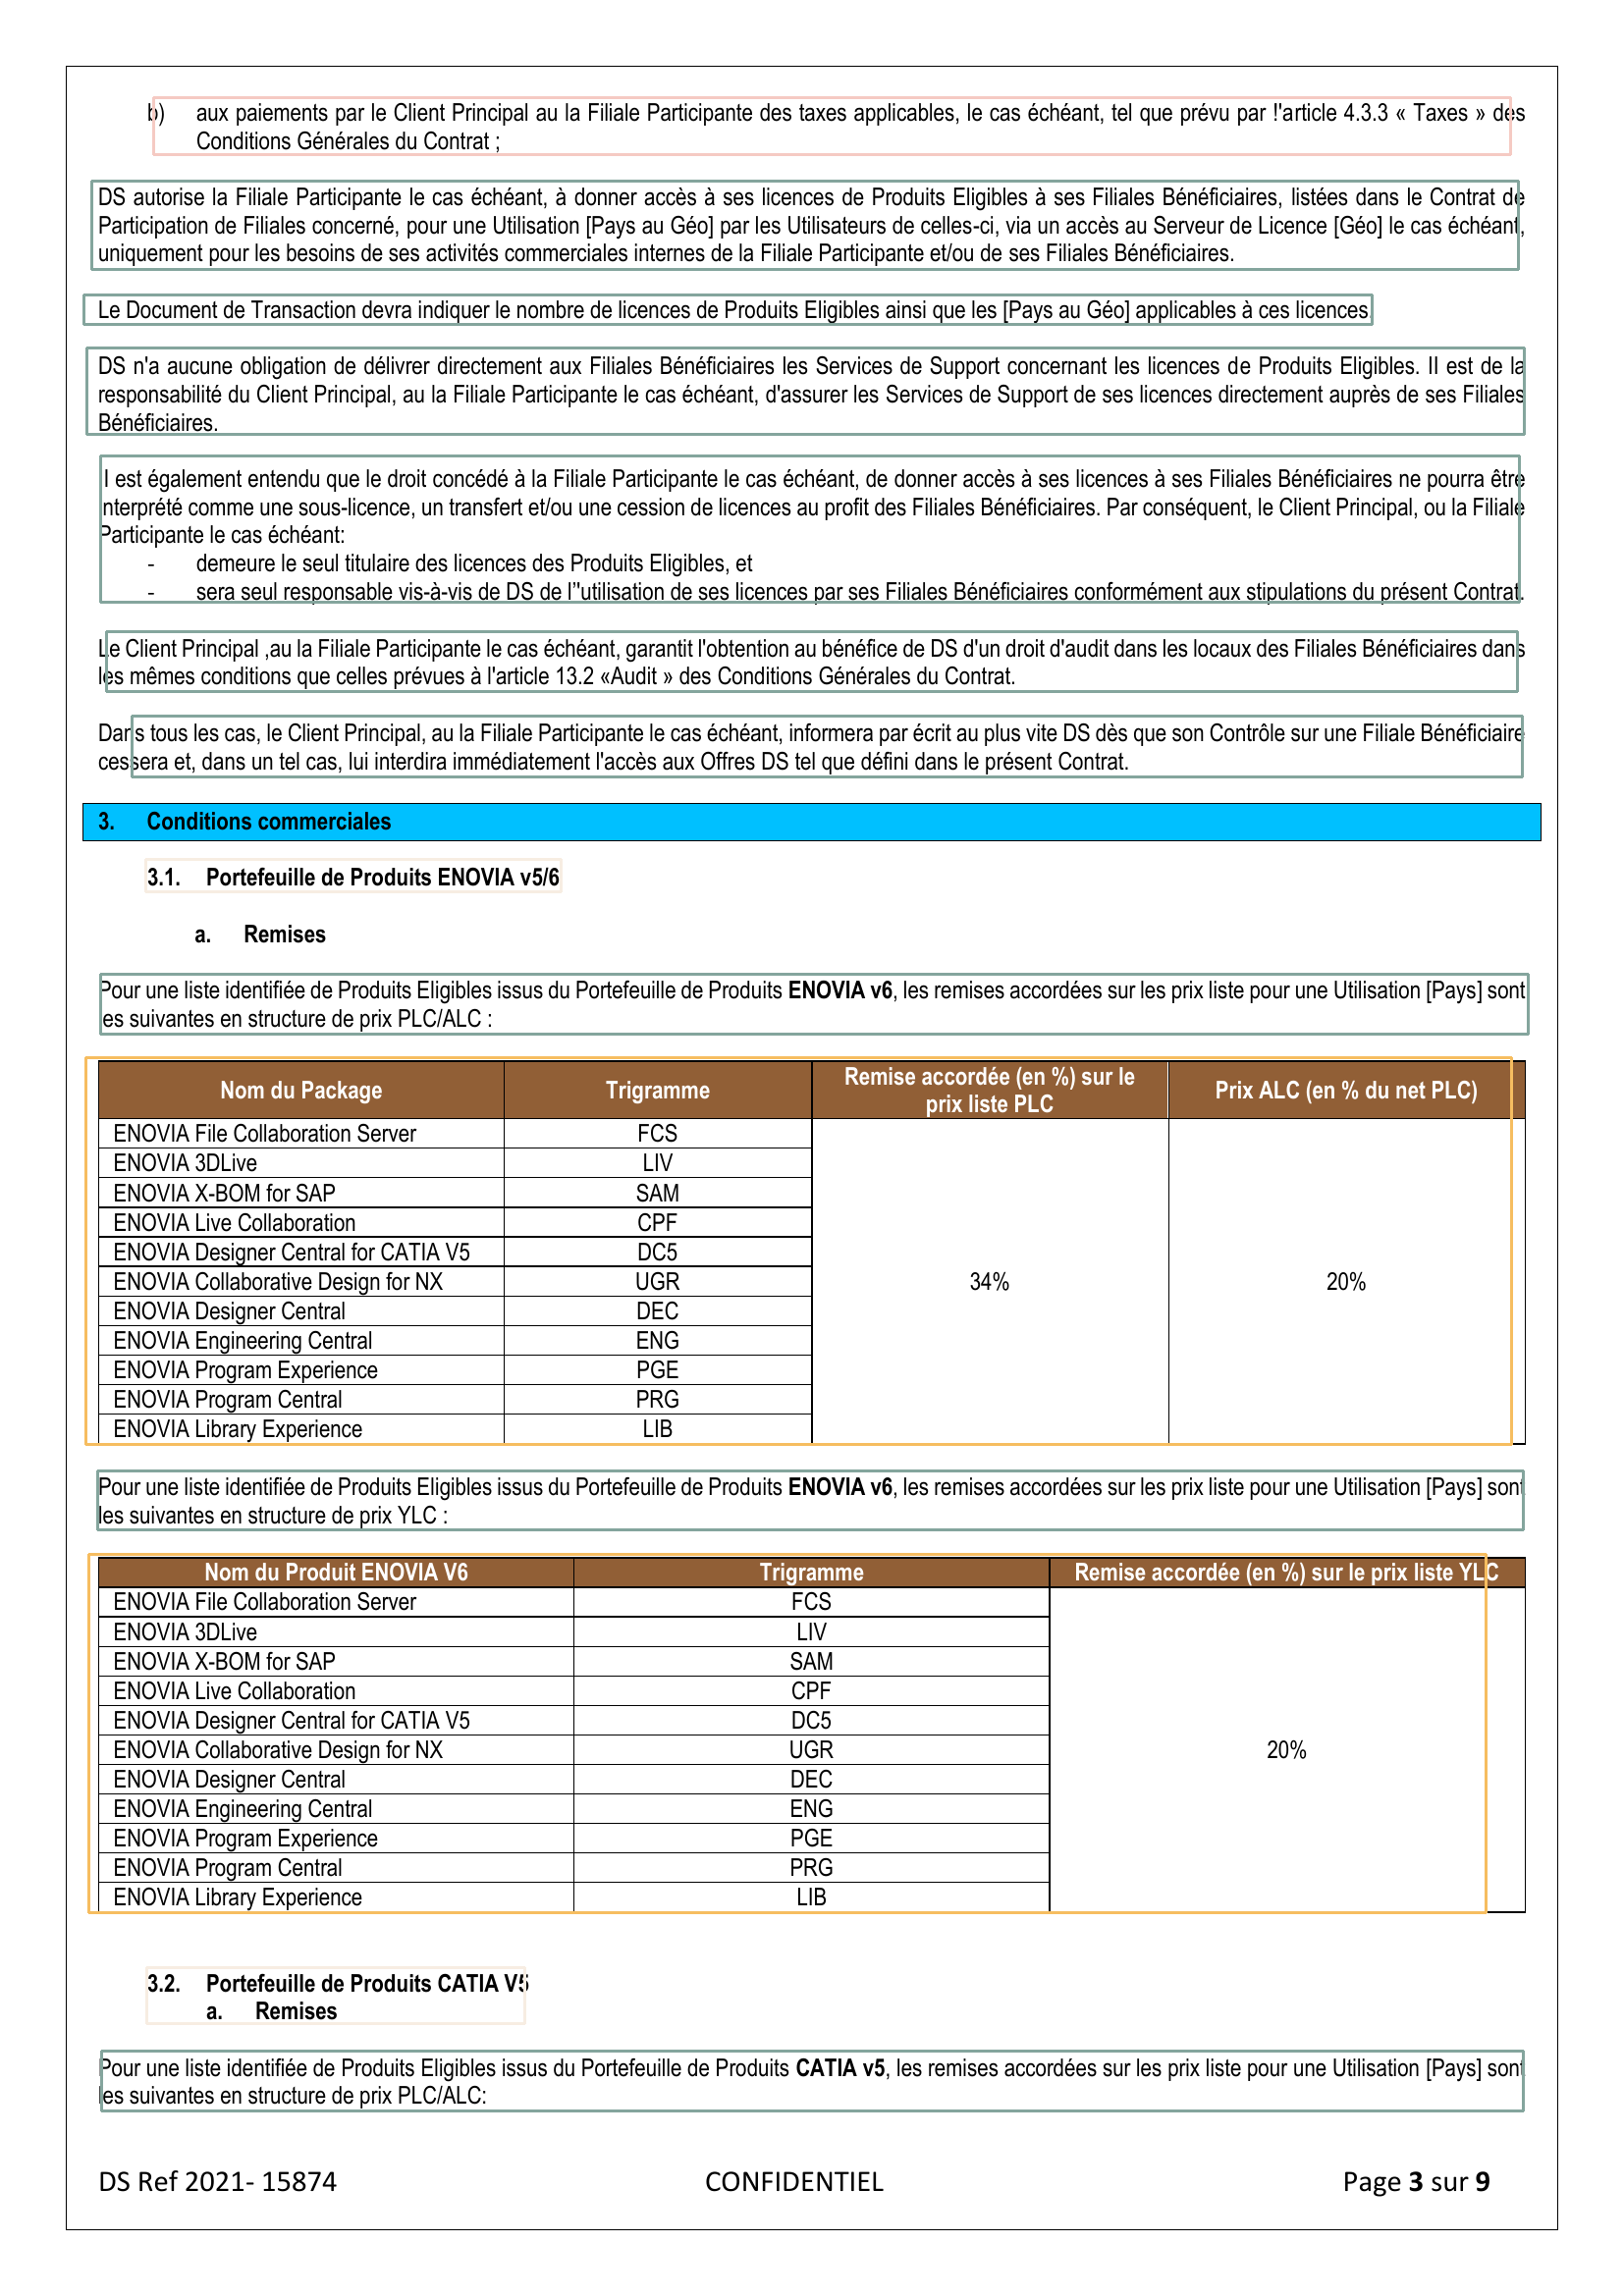

In [0]:
lp.draw_box(img, layout_result1, box_width=3)

In [0]:
import uuid
from PIL import Image
import os

bboxes = []
output_path = './generated_tables'
if not os.path.exists(output_path):
        os.makedirs(output_path)
im = Image.open('./output/page_3.png')
for b in layout_result3:
    if  b.type == 'Table' or b.type == 'Figure':
        print(b)
        bboxes.append(b.coordinates)

print(bboxes)

        


TextBlock(block=Rectangle(x_1=90.55711364746094, y_1=1584.0489501953125, x_2=1560.385498046875, y_2=1959.1181640625), text=None, id=None, type=Table, parent=None, next=None, score=0.8563547730445862)
TextBlock(block=Rectangle(x_1=95.44048309326172, y_1=1074.187744140625, x_2=1572.1983642578125, y_2=1473.1343994140625), text=None, id=None, type=Figure, parent=None, next=None, score=0.8555667400360107)
[(90.55711364746094, 1584.0489501953125, 1560.385498046875, 1959.1181640625), (95.44048309326172, 1074.187744140625, 1572.1983642578125, 1473.1343994140625)]


In [0]:
from pypdf import PdfReader

reader = PdfReader('./purchasing_contract_example.pdf')
box = reader.pages[0].mediabox


page_width = box.width  
page_height = box.height

# Dimensions of the original image in pixels
image_width = img.shape[0]
image_height = img.shape[1]

# Scale the bounding box coordinates
scaled_bboxes = []

for bbox in bboxes:
    top, left, bottom, right = bbox
    scaled_bbox = [
        top * page_height / image_height,
        left * page_width / image_width,
        bottom * page_height / image_height,
        right * page_width / image_width
    ]
    scaled_bboxes.append(scaled_bbox)

print(scaled_bboxes)


[[46.095432359171895, 403.1705947115321, 794.2682941448761, 498.6328454167113], [48.58116779073694, 273.40121754672805, 800.2812858742064, 374.94073136348004]]


[(90.55711364746094, 1584.0489501953125, 1560.385498046875, 1959.1181640625), (95.44048309326172, 1074.187744140625, 1572.1983642578125, 1473.1343994140625)]


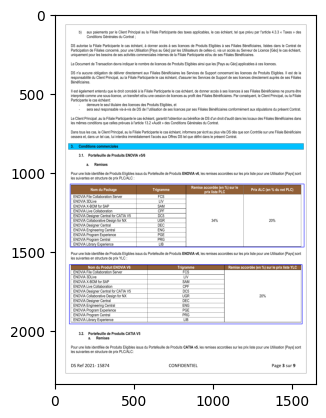

In [0]:
import cv2
import numpy as np

# Load the image
image_path = './output/page_3.png'
image = cv2.imread(image_path)

# Define bounding boxes (replace these with your actual bounding boxes)
bounding_boxes =bboxes
print(bboxes)
# Draw rectangles for each bounding box
for bbox in bounding_boxes:
    x0, y0, x1, y1 = map(int, bbox)
    cv2.rectangle(image, (x0, y0), (x1, y1), (0, 0, 255), 2)  # Red rectangles

# Save the image with bounding boxes drawn
output_image_path = 'image_with_bounding_boxes.jpg'
#cv2.imwrite(output_image_path, image)
plt.imshow(image)
#print("Bounding boxes drawn on the image:", output_image_path)


In [0]:
import tabula 
dfs = tabula.read_pdf("./purchasing_contract_example.pdf", pages='all', lattice = False)

Got stderr: Mar 18, 2024 12:13:49 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Mar 18, 2024 12:13:49 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Mar 18, 2024 12:13:49 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Mar 18, 2024 12:13:49 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:51 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:51 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:51 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:51 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:52 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:52 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:53 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:53 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Mar 18, 2024 12:13:53

In [0]:
len(dfs)

14

In [0]:
dfs[0]

,Unnamed: 0,Unnamed: 1,Remise accordée (en %) sur le,Unnamed: 2
0,Nom du Package,Trigramme,NaN,Prix ALC (en % du net PLC)
1,NaN,NaN,prix liste PLC,NaN
2,ENOVIA File Collaboration Server,FCS,NaN,NaN
3,ENOVIA 3DLive,LIV,NaN,NaN
4,ENOVIA X-BOM for SAP,SAM,NaN,NaN
5,ENOVIA Live Collaboration,CPF,NaN,NaN
6,ENOVIA Designer Central for CATIA V5,DC5,NaN,NaN
7,ENOVIA Collaborative Design for NX,UGR,34%,20%
8,ENOVIA Designer Central,DEC,NaN,NaN
9,ENOVIA Engineering Central,ENG,NaN,NaN


In [0]:
dfs[1]

,Nom du Produit ENOVIA V6,Trigramme,Remise accordée (en %) sur le prix liste YLC
0,ENOVIA File Collaboration Server,FCS,NaN
1,ENOVIA 3DLive,LIV,NaN
2,ENOVIA X-BOM for SAP,SAM,NaN
3,ENOVIA Live Collaboration,CPF,NaN
4,ENOVIA Designer Central for CATIA V5,DC5,NaN
5,ENOVIA Collaborative Design for NX,UGR,20%
6,ENOVIA Designer Central,DEC,NaN
7,ENOVIA Engineering Central,ENG,NaN
8,ENOVIA Program Experience,PGE,NaN
9,ENOVIA Program Central,PRG,NaN


In [0]:
table = tabulate(dfs[1],headers=dfs[1].columns, tablefmt="plain")
table

'    Nom du Produit ENOVIA V6              Trigramme    Remise accordée (en %) sur le prix liste YLC\n 0  ENOVIA File Collaboration Server      FCS          nan\n 1  ENOVIA 3DLive                         LIV          nan\n 2  ENOVIA X-BOM for SAP                  SAM          nan\n 3  ENOVIA Live Collaboration             CPF          nan\n 4  ENOVIA Designer Central for CATIA V5  DC5          nan\n 5  ENOVIA Collaborative Design for NX    UGR          20%\n 6  ENOVIA Designer Central               DEC          nan\n 7  ENOVIA Engineering Central            ENG          nan\n 8  ENOVIA Program Experience             PGE          nan\n 9  ENOVIA Program Central                PRG          nan\n10  ENOVIA Library Experience             LIB          nan'

In [0]:
for df in dfs:
    unnamed_cols = [col for col in df.columns if col.startswith('Unnamed')]
    if any(col.startswith('Unnamed') for col in df.columns):
        for idx, row in df.iterrows():
            for col in unnamed_cols:
                df.rename(columns={col: row[col]}, inplace=True)
    df.drop(index=0, inplace=True)


In [0]:
dfs[2]

,Produit ou Configuration CATIA,Trigramme,Remise accordée (en %) sur le,Prix ALC (en % du net PLC)
1,NaN,NaN,prix liste PLC,NaN
2,CATIA - MECHANICAL DESIGN 2 Configuration,MD2,NaN,NaN
3,CATIA - HYBRID DESIGN 2 Configuration,HD2,NaN,NaN
4,DMU KINEMATICS SIMULATOR 2 Product,KIN,NaN,NaN
5,DMU SPACE ANALYSIS 2 Product,SPA,NaN,NaN
6,CATIA - PRODUCT KNOWLEDGE TEMPLATE 1,NaN,NaN,NaN
7,NaN,KT1,NaN,NaN
8,Product,NaN,NaN,NaN
9,CATIA - 3D FUNCTIONAL TOLERANCING &,NaN,NaN,NaN
10,NaN,FT1,NaN,NaN


Layout(_blocks=[TextBlock(block=Rectangle(x_1=90.55711364746094, y_1=1584.0489501953125, x_2=1560.385498046875, y_2=1959.1181640625), text=None, id=None, type=Table, parent=None, next=None, score=0.8563547730445862), TextBlock(block=Rectangle(x_1=95.44048309326172, y_1=1074.187744140625, x_2=1572.1983642578125, y_2=1473.1343994140625), text=None, id=None, type=Figure, parent=None, next=None, score=0.8555667400360107)], page_data={})


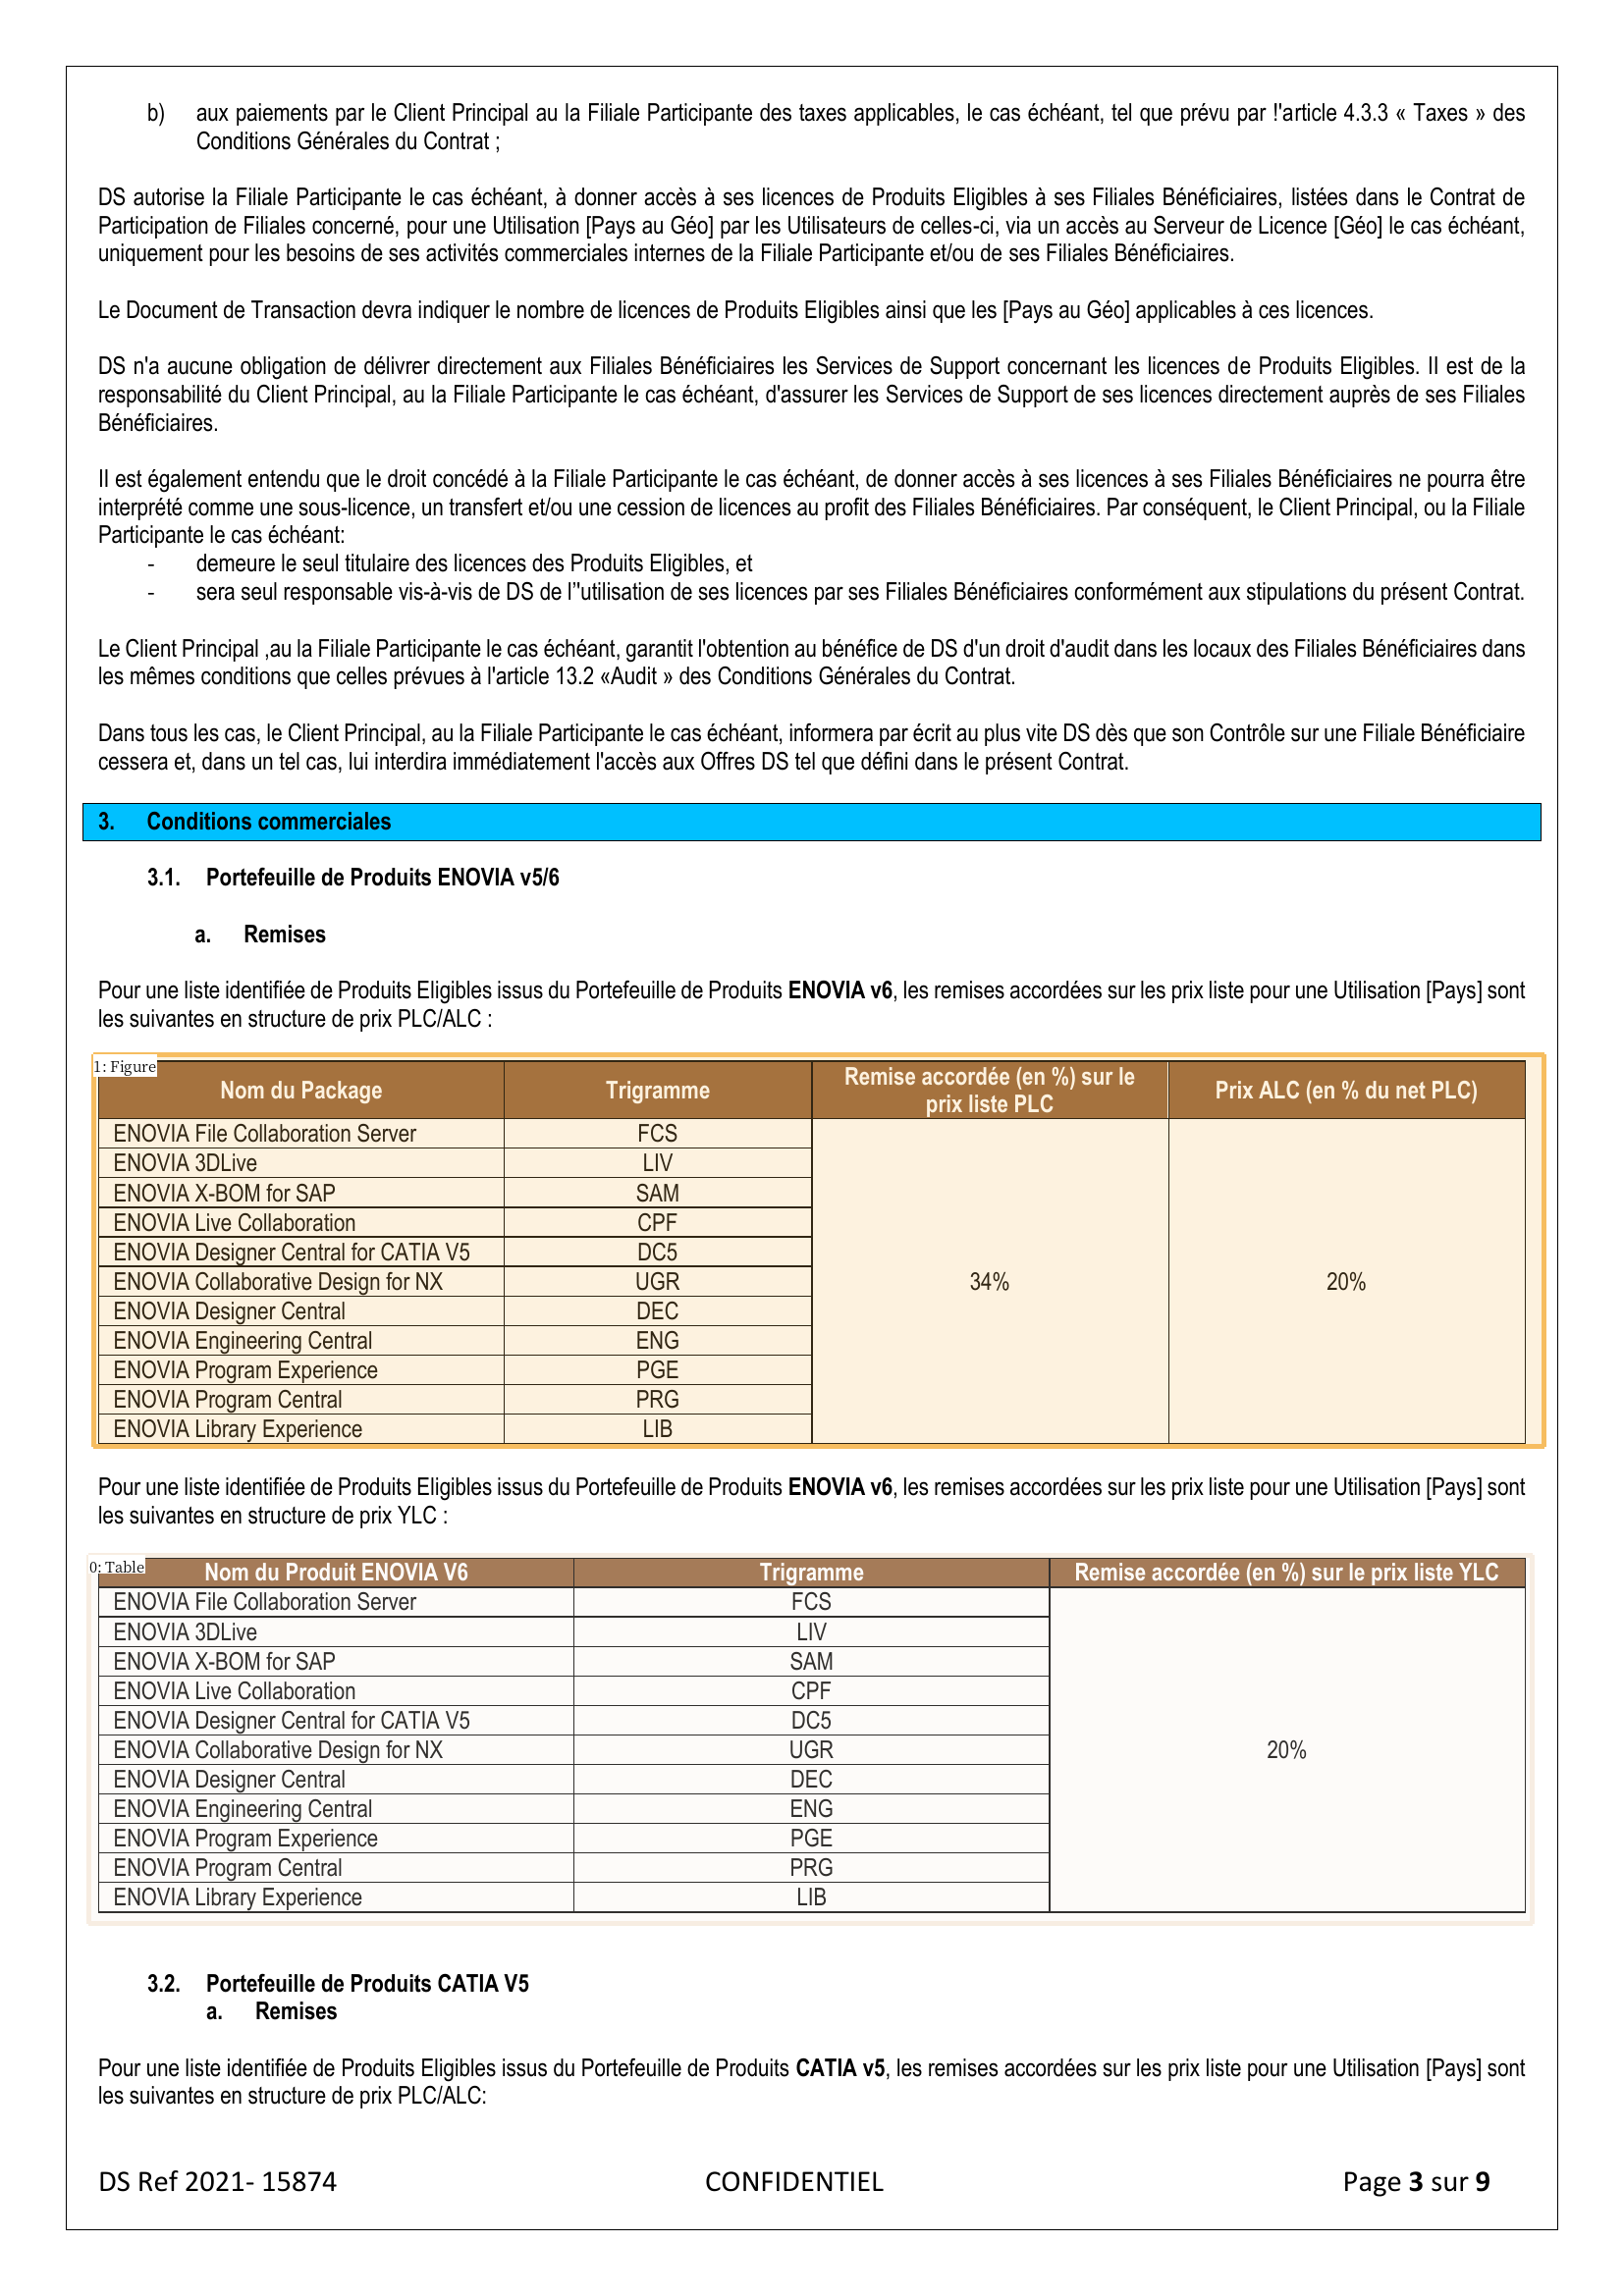

In [0]:
text_blocks2 = lp.Layout([b for b in layout_result3 if b.type == 'Figure' or b.type == 'Table' ])
title_blocks2 = lp.Layout([b for b in layout_result3 if b.type=='Title'])
print(text_blocks2)
lp.draw_box(img, text_blocks2,  box_width=5, box_alpha=0.2, show_element_type=True, show_element_id=True)

In [0]:
print(text_blocks2)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=90.55711364746094, y_1=1584.0489501953125, x_2=1560.385498046875, y_2=1959.1181640625), text=None, id=None, type=Table, parent=None, next=None, score=0.8563547730445862), TextBlock(block=Rectangle(x_1=95.44048309326172, y_1=1074.187744140625, x_2=1572.1983642578125, y_2=1473.1343994140625), text=None, id=None, type=Figure, parent=None, next=None, score=0.8555667400360107)], page_data={})


In [0]:
ocr_agent = lp.TesseractAgent(languages='fra')

image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/2, axis='x').put_on_canvas(img)
left_blocks = text_blocks2.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])
right_blocks = [b for b in text_blocks2 if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks1 = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [0]:
for block in text_blocks2:

    # Crop image around the detected layout
    segment_image = (block
                       .pad(left=15, right=15, top=5, bottom=5)
                       .crop_image(img))
    
    # Perform OCR
    text = ocr_agent.detect(segment_image)

    # Save OCR result
    block.set(text=text, inplace=True)

In [0]:
for txt in text_blocks2:
    print("Text = ",txt.text)
    print("x_1=",txt.block,end='\n---\n')


Text =   

 

 

 

 

 

 

 

 

 

 

 

Nom du Produit ENOVIA V6 Trigramme

ENOVIA File Collaboration Server FCS
ENOVIA 3DLive LIV

ENOVIA X-BOM for SAP SAM
ENOVIA Live Collaboration CPF
ENOVIA Designer Central for CATIA V5 DC5
ENOVIA Collaborative Design for NX UGR
ENOVIA Designer Central DEC
ENOVIA Engineering Central ENG
ENOVIA Program Experience PGE
ENOVIA Program Central PRG
ENOVIA Library Experience LIB

 

 

Remise accordée (en %) sur le prix liste YLC

20%

 

x_1= Rectangle(x_1=90.55711364746094, y_1=1584.0489501953125, x_2=1560.385498046875, y_2=1959.1181640625)
---
Text =  Nom du Package

LL LCL

Remise accordée (en %) sur le

DD RACE TREK]

 

 

 

 

 

 

 

 

 

 

 

 

 

ENOVIA File Collaboration Server FCS
ENOVIA 3DLive LIV
ENOVIA X-BOM for SAP SAM
ENOVIA Live Collaboration CPF
ENOVIA Designer Central for CATIA V5 DC5
ENOVIA Collaborative Design for NX UGR
ENOVIA Designer Central DEC
ENOVIA Engineering Central ENG
ENOVIA Program Experience PGE
ENOVIA Program 

In [0]:
import pdfplumber 
import re

pdf = pdfplumber.open('./purchasing_contract_example.pdf')
p0 = pdf.pages[3]

In [0]:
im = p0.to_image()

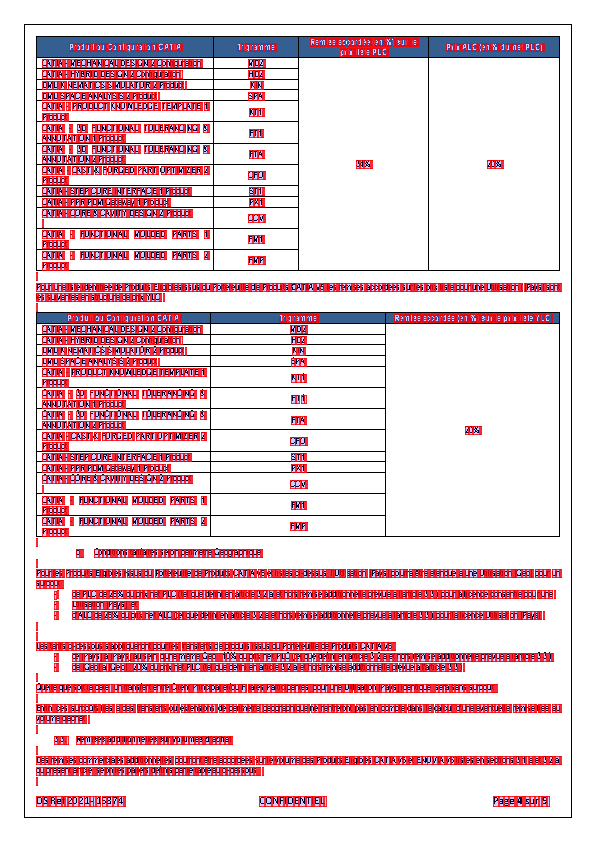

In [0]:
im.reset().draw_rects(p0.chars)

In [0]:
text = p0.extract_text(keep_blank_chars=True)
print(text)

Remise accordée (en %) sur le 
Produit ou Configuration CATIA  Trigramme  Prix ALC (en % du net PLC) 
prix liste PLC 
CATIA - MECHANICAL DESIGN 2 Configuration  MD2 
CATIA - HYBRID DESIGN 2 Configuration  HD2 
DMU KINEMATICS SIMULATOR 2 Product  KIN 
DMU SPACE ANALYSIS 2 Product  SPA 
CATIA - PRODUCT KNOWLEDGE TEMPLATE 1 
KT1 
Product 
CATIA  -  3D  FUNCTIONAL  TOLERANCING  & 
FT1 
ANNOTATION 1 Product 
CATIA  -  3D  FUNCTIONAL  TOLERANCING  & 
FTA 
ANNOTATION 2 Product 
34%  20% 
CATIA - CAST & FORGED PART OPTIMIZER 2 
CFO 
Product 
CATIA - STEP CORE INTERFACE 1 Product  ST1 
CATIA - PPR PDM Gateway 1 Product  PX1 
CATIA - CORE & CAVITY DESIGN 2 Product 
CCV 
 
CATIA  -  FUNCTIONAL  MOLDED  PARTS  1 
FM1 
Product 
CATIA  -  FUNCTIONAL  MOLDED  PARTS  2 
FMP 
Product 
 
Pour une liste identifiée de Produits Eligibles issus du Portefeuille de Produits CATIA v5, les remises accordées sur les prix liste pour une Utilisation ([Pays] sont 
les suivantes en structure de prix YLC: 
 
Produit 

In [0]:
import pdftotext

with open("./purchasing_contract_example.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)

# All pages
for text in pdf:
    print(text)

AVENANT N°5 (ref 2021-15874)
AU CONTRAT CADRE CLIENT DE LICENCE ET DE SERVICES EN LIGNE DASSAULT
SYSTEMES (Ref. 02082-2016 DS)
Le présent avenant (ci-après, l’« Avenant N°5 ») au Contrat Cadre Client de Licence et de Services en Ligne prend effet le 1er janvier 2022 (Date d’Entrée en
Vigueur de l’Avenant N°5) entre d’une part, la société DASSAULT SYSTEMES SE, une société européenne de droit français, dont le siège social est situé en
France 10, rue Marcel Dassault, 78140 Vélizy-Villacoublay (ci-après, « DS ») et d’autre part, PLASTIC OMNIUM GESTION, une société de droit français,
immatriculée sous le numéro 410314207, dont le siège social est sis 19 Boulevard Jules Carteret, 69007 Lyon, France (ci-après, le « Client Principal »).
DS et le Client Principal étant ensemble désignés ci-après les « Parties ».
Préambule:
DS et le Client Principal ont conclu un Contrat Cadre Client de Licence et de Services en Ligne entré en vigueur le 1er juin 2016 (réf. 02082-2016DS), ci-après
dénommé le « 

Deep Detection

In [0]:
!pip install deepdoctection
!pip install timm
!apt-get install -y poppler-utils

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.3/410.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Not uninstalling tqdm at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-23d4b4bd-cc13-4a17-b401-9b11f65523b0
    Can't uninstall 'tqdm'. No files were found to uninstall.
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Not uninstalling pillow at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-23d4b4bd-cc13-4a17-b401-9b11f65523b0
  

In [0]:
dbutils.library.restartPython()

In [0]:
import deepdoctection as dd
from IPython.core.display import HTML
from matplotlib import pyplot as plt

analyzer = dd.get_dd_analyzer()  # instantiate the built-in analyzer similar to the Hugging Face space demo

df = analyzer.analyze(path = "purchasing_contract_example.pdf")  # setting up pipeline
df.reset_state()                 # Trigger some initialization

page_num = 0
doc = iter(df)
#page = next(doc) 
for page in doc:
    page_num+=1
    if page_num == 3:
        table = page.tables[0].html
        df = pd.read_html(table)[0]
        print(df)

tokenizer_config.json:   0%|          | 0.00/170 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

d2_model_0829999_layout_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0320 14:00.53 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_publaynet_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/104 [00:00<?, ?B/s]

d2_model_1639999_item_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0320 14:00.58 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_rc_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/104 [00:00<?, ?B/s]

d2_model_1849999_cell_inf_only.ts:   0%|          | 0.00/275M [00:00<?, ?B/s]

[0320 14:01.02 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_c_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


CASCADE_RCNN_R_50_FPN_GN_TS.yaml:   0%|          | 0.00/102 [00:00<?, ?B/s]

/databricks/python/lib/python3.10/site-packages/torch/nn/modules/module.py:1501: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return forward_call(*args, **kwargs)
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:02.18 @maputils.py:90]  WRN  MappingContextManager error. Will fi

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1603931226152823>, line 17
     15 if page_num == 3:
     16     table = page.tables[0].html
---> 17     df = pd.read_html(table)[0]
     18     print(df)

NameError: name 'pd' is not defined

In [0]:
import deepdoctection as dd
from bs4 import BeautifulSoup
import pandas as pd

analyzer = dd.get_dd_analyzer()  # instantiate the built-in analyzer similar to the Hugging Face space demo

df = analyzer.analyze(path="purchasing_contract_example.pdf")  # setting up pipeline
df.reset_state()  # Trigger some initialization

page_num = 0
doc = iter(df)
for page in doc:
    page_num += 1
    if page_num == 3:
        table_html = page.tables[0].html  # Get the HTML representation of the table

        # Parse the HTML using BeautifulSoup
        soup = BeautifulSoup(table_html, 'html.parser')
        print('SOUP', soup)
        

        # Convert the modified HTML back to a DataFrame
        df = pd.read_html(str(soup), na_values=[''])[0]
        
        df

[0320 14:02.52 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_publaynet_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.
[0320 14:02.54 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_rc_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.
[0320 14:02.55 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_c_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.
[0320 14:04.05 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:04.05 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:04.05 @maputils.py:90]  WRN  MappingContextManager error

SOUP <table><tr><td>Nom du Package</td><td>Trigramme</td><td>Remise accordée (en %) sur le prix liste PLC</td><td>Prix ALC (en % du net PLC)</td></tr><tr><td>ENOVIA File Collaboration Server</td><td>FCS</td><td></td><td></td></tr><tr><td></td><td>LIV</td><td></td><td></td></tr><tr><td>ENOVIA X-BOM for SAP</td><td>SAM</td><td></td><td></td></tr><tr><td>ENOVIA Live Collaboration</td><td>CPF</td><td></td><td></td></tr><tr><td>ENOVIA Designer Central for CATIA V5</td><td>DC5</td><td></td><td></td></tr><tr><td>ENOVIA Collaborative Design for NX</td><td>UGR</td><td>34%</td><td>20%</td></tr><tr><td>ENOVIA Designer Central</td><td>DEC</td><td></td><td></td></tr><tr><td>ENOVIA Engineering Central</td><td>ENG</td><td></td><td></td></tr><tr><td>ENOVIA Program Experience</td><td>PGE</td><td></td><td></td></tr><tr><td>ENOVIA Program Central</td><td>PRG</td><td></td><td></td></tr><tr><td>ENOVIA Library Experience</td><td>LIB</td><td></td><td></td></tr></table>


[0320 14:04.34 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:04.34 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:04.34 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:04.34 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:05.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:05.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:05.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:05.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:05.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:05.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:05.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 14:0

In [0]:
pd.DataFrame(df)

,0,1,2,3
0,Nom du Package,Trigramme,Remise accordée (en %) sur le prix liste PLC,Prix ALC (en % du net PLC)
1,ENOVIA File Collaboration Server,FCS,NaN,NaN
2,NaN,LIV,NaN,NaN
3,ENOVIA X-BOM for SAP,SAM,NaN,NaN
4,ENOVIA Live Collaboration,CPF,NaN,NaN
5,ENOVIA Designer Central for CATIA V5,DC5,NaN,NaN
6,ENOVIA Collaborative Design for NX,UGR,34%,20%
7,ENOVIA Designer Central,DEC,NaN,NaN
8,ENOVIA Engineering Central,ENG,NaN,NaN
9,ENOVIA Program Experience,PGE,NaN,NaN


In [0]:
import deepdoctection as dd
import pandas as pd

analyzer = dd.get_dd_analyzer()
doc = analyzer.analyze(path="purchasing_contract_example.pdf")
doc.reset_state()

[0320 11:11.42 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_publaynet_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.
[0320 11:11.45 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_rc_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.
[0320 11:11.47 @model.py:1012]  ERR  File downloaded from deepdoctection/d2_casc_rcnn_X_32xd4_50_FPN_GN_2FC_pubtabnet_c_inference_only does not match the expected size! You may have downloaded a broken file, or the upstream may have modified the file.


In [0]:
# Assuming page 3 contains the table
page_num = 0
for page in doc:
    page_num += 1
    if page_num == 3:
        table_html = page.tables[0].html
        df_html = pd.read_html(table_html)[0]
        df_html = pd.DataFrame(df_html)
        # Set the first row as the new column names
        df_html.columns = df_html.iloc[0]

        # Drop the first row
        df_html = df_html.iloc[1:].reset_index(drop=True)
        print(df_html)

        # Fill NaN values with the correct values from the merged cells
        for col in df_html.columns:
            for i in range(len(df_html)):
                if pd.isna(df_html[col].iloc[i]):
                    df_html[col].iloc[i] = df_html[col].iloc[i - 1]

        print(df_html)

[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:16.49 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


0                         Nom du Package  ... Prix ALC (en % du net PLC)
0       ENOVIA File Collaboration Server  ...                        NaN
1                                    NaN  ...                        NaN
2                   ENOVIA X-BOM for SAP  ...                        NaN
3              ENOVIA Live Collaboration  ...                        NaN
4   ENOVIA Designer Central for CATIA V5  ...                        NaN
5     ENOVIA Collaborative Design for NX  ...                        20%
6                ENOVIA Designer Central  ...                        NaN
7             ENOVIA Engineering Central  ...                        NaN
8              ENOVIA Program Experience  ...                        NaN
9                 ENOVIA Program Central  ...                        NaN
10             ENOVIA Library Experience  ...                        NaN

[11 rows x 4 columns]
0                         Nom du Package  ... Prix ALC (en % du net PLC)
0       ENOVIA File Collabor

[0320 11:17.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.42 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.42 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.42 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.42 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.42 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.42 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:17.42 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:1

In [0]:
for page in doc:
    print(page.text)

AU CONTRAT CADRE CLIENT DE LICENCE ET DE SERVICES EN LIGNE DASSAULT SYSTEMES (Ref. 02082-2016 DS)
Le présent avenant (ci-aprés, I’« Avenant N°5 ») au Contrat Cadre Client de Licence et de Services en Ligne prend effet le 1° janvier 2022 (Date d’Entrée en Vigueur de l’Avenant N°5) entre d’une part, la société DASSAULT SYSTEMES SE, une société européenne de droit francais, dont le siége social est situé en France 10, rue Marcel Dassault, 78140 Vélizy-Villacoublay (ci-aprés, « DS ») et d’autre part, PLASTIC OMNIUM GESTION, une société de droit francais, immatriculée sous le numéro 410314207, dont le siége social est sis 19 Boulevard Jules Carteret, 69007 Lyon, France (ci-aprés, le « Client Principal »).
DS et le Client Principal étant ensemble désignés ci-aprés les « Parties ».
Préambule:
DS et le Client Principal ont conclu un Contrat Cadre Client de Licence et de Services en Ligne entré en vigueur le ‘er juin 2016 (réf. 02082-2016DS), ci-aprés dénommé le « Contrat ».
DS et le Client Pri

[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


b) aux paiements par le Client Principal au la Filiale Participante des taxes applicables, le cas échéant, tel que prévu par !'article 4.3.3 « Taxes » des Conditions Générales du Contrat ;
DS autorise la Filiale Participante le cas échéant, a donner accés a ses licences de Produits Eligibles a ses Filiales Bénéficiaires, listées dans le Contrat de Participation de Filiales concerné, pour une Utilisation [Pays au Géo] par les Utilisateurs de celles-ci, via un accés au Serveur de Licence [Géo] le cas échéant, uniquement pour les besoins de ses activités commerciales intemes de la Filiale Participante et/ou de ses Filiales Bénéficiaires.
Le Document de Transaction devra indiquer le nombre de licences de Produits Eligibles ainsi que les [Pays au Géo] applicables a ces licences.
DS n'a aucune obligation de délivrer directement aux Filiales Bénéficiaires les Services de Support concernant les licences de Produits Eligibles. II est de la responsabilité du Client Principal, au la Filiale Parti

[0320 11:27.59 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.59 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.59 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:27.59 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


Pour une liste identifiée de Produits Eligibles issus du Portefeuille de Produits CATIA v5, les remises accordées sur les prix liste pour une Utilisation ([Pays] sont les suivantes en structure de prix YLC:
Conditions tarifaires selon périmétre Géographique
Pour les Produits Eligibles issus du Portefeuille de Produits CATIA v5 et listés ci-dessus, |'Utilisation [Pays] pourra étre étendue a une Utilisation [Géo] pour un surcoat:
- de PLC de 25% du prix net PLC (tel que défini en article 3.2.a et hors remise additionnelle prévue a l'article 3.3.) pour la licence consentie pour une - Utilisation [Pays], et - d'ALC de 25% du prix net ALC (tel que défini en article 3.2.a et hors remise additionnelle prévue a l'article 3.3.) pour la licence Utilisation [Pays].
pour - de [Pays] a [Pays] au sein d'une méme Géo : 10% du prix net PLC (tel que défini en article 3.2.a et hors remise additionnelle prévue a l'article 3.3.) - de [Géo] a [Géo] : 20% du prix net PLC (tel que défini en article 3.2.a et 

[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


Ces remises commerciales additionnelles ne s'appliqueront que sur les Produits Eligibles en structure de prix PLC, sous réserve que la somme des commandes du Client Principal el de ses Filiales Participantes sur une période de 4 (quatre) semaines atteigne l'un de ces paliers.
Ces remises commerciales excluront donc les Produits Eligibles en structure de prix ALC, YLC el QLC ainsi que toute autre charge facturée comme les frais d'ajustement liés a un transfert ou une extension de périmétre géographique.
3.4. Portefeuille de Produits SIMULIA Abaqus FEA v6.1x a Remises
Le niveau de remise a appliquer sur les commandes de Produits Eligibles issus du Portefeuille de Produits SIMULIA ABAQUS FEA v6.1x et dont la Date d'Effet est en année n ou le dernier mois de l'année n-1 sera déterminé par le montant en prix liste de l'ensemble des commandes passées :
par le Client Principal et ses Filiales Participantes ; et uniquement en structure de prix PLC, ALC ou YLC ; et uniquement au cours du dernie

[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:28.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:2

Une Configuration DELMIA Apriso 2 (avec les modules Production, Warehouse, Maintenance) pour 1 (un) Site comprend les Produits Eligibles et les Ressources suivants :
Une Configuration DELMIA Apriso 3 (avec les modules Production, Quality, Maintenance) pour 1 (un) Site comprend les Produits Eligibles et les Ressources suivants :
DS Ref 2021- 15874



[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:29.08 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


b Conditions tarifaires DELMIA Apriso
Le Client Principal ou la Filiale Participante pourra bénéficier, pendant une période de 3 ans a compter de la Date d’Entrée en Vigueur de l’Avenant, de la possibilité de remplacer une Configuration DELMIA Apriso par une autre (Ex : changer une Configuration DELMIA Apriso 1 en une Configuration DELMIA Apriso 3 pour un Site donné) et ce, une fois par an maximum, a condition que ladite Configuration a remplacer soit a jour du paiement de |’ALC.
Les Services de Support (ALC) sont calculés sur la base de 20% (vingt pourcent) de la PLC nette HT pour un niveau ADVANTAGE.
Les prix des Configurations et/ou modules additionnels seront les suivants :
* Autonomous Satellite Site signifie le Client Principal utiliser les Produits Eligibles DELMIA Apriso dans les mémes conditions qu’un Site Satellite (tel que pourra que défini dans les OST) mais avec la possibilité supplémentaire d’étre téléchargé et installé sur ledit Autonomous Satellite Site, sans étre ratta

In [0]:
for page in doc:
    for layout in page.layouts:
        if layout.category_name=="title":
            print(f"Title: {layout.text}")


Title: PLASTIC OMNIUM GESTION
Title: _Datedeffetdu présentAvenant
Title: 
Title: Préambule:
Title: DASSAULT SYSTEMES SE
Title: Objet
Title: AU CONTRAT CADRE CLIENT DE LICENCE ET DE SERVICES EN LIGNE DASSAULT SYSTEMES (Ref. 02082-2016 DS)
Title: 
Title: Definitions


[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


Title: a Remises
Title: 3.1. Portefeuille de Produits ENOVIA v5/6
Title: 3.2. Portefeuille de Produits CATIA V5
Title: 


[0320 11:55.28 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.28 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.28 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.28 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


Title: 3.3. Remises additionnelles sur volumes d’achat


[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:55.47 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


Title: 3.5. Portefeuille de Produits SIMULIA iSight
Title: 3.6. Portefeuille de Produits Delmia Apriso a Configurations pour le Client Principal
Title: a Remises


[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.20 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:5

Title: DS Ref 2021- 15874


[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 11:56.44 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


Title: b Conditions tarifaires DELMIA Apriso
Title: 3.7. Durée de validité des conditions commerciales
Title: c Révision des prix
Title: 4.4. Limitation de responsabilité
Title: 4.3. Garantie
Title: 4.2. Paiement
Title: 4.1. Services de Support
Title: Larticle 6 « Garantie » des Conditions Générales est modifié et remplacé comme suit :
Title: FIN DES CONDITIONS SPECIFIQUES
Title: 4.7. Cession par DS
Title: 4.6. Conditions supplémentaires pour les Services en Ligne
Title: 4.5. Audit


In [0]:
for page in doc:
    print(page.layouts)


[Layout(active=True, _annotation_id='dee8cbe2-7b1e-3c75-9fc3-496bf0df1047', category_name=<LayoutType.text>, _category_name=<LayoutType.text>, category_id='1', score=0.9939345121383667, sub_categories={<Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='3d3920e9-cbdd-3249-af9c-5cdee235fa66', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='5', score=None, sub_categories={}, relationships={})}, relationships={<Relationships.child>: ['121f4609-b5a7-3742-9dec-efc9a5043c58', '0316f09c-75c2-3c8f-af9e-a76b9fb53a83', '52d83dbd-82c7-335f-83a8-555272910880', 'c863bbc9-9bf4-3378-bc52-964a90051e0d', '4dade9da-7649-3c45-921e-ee42444db89d', '5e2fee89-dd8a-3e01-bc79-914531b08177', '9c0fb923-5299-3e10-aa9b-cfda23f39b0d', '103df2ca-d687-34f5-8b8e-afd360360c4e', '4c34e242-df35-3fdd-b974-0aeb0d014f19', 'b6db9189-7376-3a84-9b93-4dec5f925322', 'd8165df4-63a9-33f9-9d74-94a5ce1a14a9', '44c2e399-4c1e-35ed-a7cb-525da226ab15', '6

[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:16.58 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[Layout(active=True, _annotation_id='3e230e24-c36d-3d7d-8205-6a8a4be12dba', category_name=<LayoutType.text>, _category_name=<LayoutType.text>, category_id='1', score=0.9979557991027832, sub_categories={<Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='7655dab6-f917-36b4-a623-a12f75217560', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='12', score=None, sub_categories={}, relationships={})}, relationships={<Relationships.child>: ['9bc42144-6582-3d41-b4a7-9d616e56b75a', '05449aee-be78-33b0-a7ac-9b15b1be7f1f', 'e60a9960-2361-3453-89d7-5ef27767c40d', '0d5d6a22-8e4b-3d13-a883-fa922b24d6cc', 'aacae634-3711-339a-b81c-3c9f57418dd5', '9b07c90d-a6c3-388b-bb1e-37ceed8a3305', '98b9e475-6087-3bcb-84ad-309ff4535a4a', '1ae13bd6-35aa-335b-93b8-0b336fb7e7fe', '305c257d-a734-3fb1-aa6b-5fa6c9ccde48', '3f881060-7714-34d1-bfe7-2ea77f18a65b', 'f8d493e2-7d4f-366f-9ee7-2b1b54526f5c', 'b188c832-9092-324d-a02b-6795413a703e', '

[0320 12:17.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.17 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[Layout(active=True, _annotation_id='04a2d8fb-083d-3bd1-8f47-2eea49d76fca', category_name=<LayoutType.text>, _category_name=<LayoutType.text>, category_id='1', score=0.9951440691947937, sub_categories={<Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='2ffab831-47f8-3978-a155-c137ade953ef', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='9', score=None, sub_categories={}, relationships={})}, relationships={<Relationships.child>: ['add01e54-e26f-3675-937d-6cc86a3b9e8d', '348cff0e-101b-34de-8c9e-71d02c12d082', '1de137d2-8328-344f-b6ea-bf2af3237dbb', '0da770dc-3063-317e-bcd9-efb7ef361bbf', 'f81c3662-c902-367d-8721-88f11cf182c9', '8063bbd6-6aee-306c-b636-b327f7d5f65a', '448505fe-8878-3530-abf5-31de7536e8ef', '12a8fdc8-1a19-3fbc-a83d-3068d040cce2', '3a7a8687-7de5-3920-836c-1c38e77687dd', '9fe96265-edeb-3b6e-b48a-e8d078d13298', '512135c4-a4fe-30e0-867b-68603c1c49b7', 'eb4df2db-e979-3e92-8aa5-0823d9456f6e', '6

[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:17.36 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[Layout(active=True, _annotation_id='0c1577a7-51a4-3541-9cb0-550a75e75a07', category_name=<LayoutType.text>, _category_name=<LayoutType.text>, category_id='1', score=0.995532214641571, sub_categories={<Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='f996ced2-9130-384c-8f71-1c80119413c1', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='10', score=None, sub_categories={}, relationships={})}, relationships={<Relationships.child>: ['dc02e138-8200-312e-9f2d-ec95c19d207c', '62dcff8a-e91d-32ee-980d-4e5e556b35bb', '5291c58e-79f7-398e-91b1-b26a988a744c', '97ea1187-ad41-3340-8101-5689c1b50839', '0222b56f-849d-3958-94cc-66a50868a8bd', '425b0457-1281-35d1-99ff-6ef906d51437', '90498661-f1e4-3949-b33c-740a9eac3362', 'e5c911ba-7322-37b0-9af9-e82555b2a936', 'f0544d87-f14f-31c0-beaf-10da52c212dc', 'd495c4be-b508-3c68-aee8-0e0c81ea2985', '3de6ae0b-c2a2-37fb-9599-543b0c269204', '588925f2-c89e-3e79-8f7b-505c41f3f2db', 'e

[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.07 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:1

[Layout(active=True, _annotation_id='53889030-c749-3c20-8746-fa203092fc43', category_name=<LayoutType.text>, _category_name=<LayoutType.text>, category_id='1', score=0.9764770269393921, sub_categories={<Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='ce61279b-0d66-3239-b398-208f1adaf8f0', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='2', score=None, sub_categories={}, relationships={})}, relationships={<Relationships.child>: ['37635b64-bbe3-3b3f-88f9-5578ae29f778', 'bbbf8b28-159f-39a3-95e7-0a2405390bbe', '2d75d3cd-81a0-3bfa-8586-afa5718f5650', 'c34a70ee-06bd-3753-b07c-ad3917f2a14a', '9fd85443-ecac-3543-a1a7-e32b1028bf18', 'bdad0ab5-c7d9-37e3-a9b1-e3ec9d5fd132', '530e82fb-3ed2-3498-932b-c9ebe8bc4b01', '97fa7012-932c-3246-aa48-4dcd3a82f267', '3aac2df1-1b20-3bee-bef2-31e8220743ca', 'ca6d1db9-1a85-3be8-8898-099f5ad6e262', '4ed5328b-6c1d-3337-9507-4a43200bc284', '86aac3a3-b36e-3fe2-95a5-ab93b8c03d4a', '8

[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:18.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[Layout(active=True, _annotation_id='aff0c38c-11b7-32ca-9cc5-9f237cf4b6d6', category_name=<LayoutType.text>, _category_name=<LayoutType.text>, category_id='1', score=0.9952888488769531, sub_categories={<Relationships.reading_order>: CategoryAnnotation(active=True, _annotation_id='41d4baad-dc7e-30f7-a7f3-0c7eece5239b', category_name=<Relationships.reading_order>, _category_name=<Relationships.reading_order>, category_id='2', score=None, sub_categories={}, relationships={})}, relationships={<Relationships.child>: ['0661078d-78e5-32df-aff8-38bb03b82511', 'b96c3076-303a-3360-a2e1-929b9f78dc71', '64030d9e-e306-3b2b-891e-d07604ed438a', '7f26feb1-be87-359d-8fb8-d5d30173b1a8', '5d2cb4e6-0904-3fce-917e-e7de2c581a10', 'efc77382-46c7-32ca-a7dd-49a2ab868652', 'c4ca7c90-50cc-3fd2-af7f-d4072dc52d48', '180f77f7-0af3-3b1c-8b22-1d23ca8fb03e', 'ff9d70cb-a3db-3355-a015-eb54627393a6', '3b904442-dcb3-30ae-8923-78ed2cfcde71', '3e5d6783-37c8-30ca-940f-0e7bb8f5db5a', '606e34ce-0913-3d3d-88e0-1a0865432e9e', 'd

In [0]:
match_service = analyzer.pipe_component_list[6]
match_service


In [0]:
print(f"parent_categories: {match_service.parent_categories}, child_categories: {match_service.child_categories}")


parent_categories: ['text', 'title', 'list', 'cell', 'column_header', 'projected_row_header', 'spanning', 'row_header'], child_categories: word


In [0]:
text_order_service = analyzer.pipe_component_list[7]
print(f"text_container: {text_order_service.text_container} \n floating_text_block_categories: {text_order_service.floating_text_block_categories} \n text_block_categories: {text_order_service.text_block_categories} \n include_residual_text_container: {text_order_service.include_residual_text_container}")


text_container: word 
 floating_text_block_categories: [<LayoutType.title>, <LayoutType.text>, <LayoutType.list>] 
 text_block_categories: [<LayoutType.title>, <LayoutType.text>, <LayoutType.list>, <LayoutType.cell>, <CellType.column_header>, <CellType.projected_row_header>, <CellType.spanning>, <CellType.row_header>] 
 include_residual_text_container: False


In [0]:
for page in doc:
    print(page.chunks)


[('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '5ec5c9d9-1cb5-3e8f-9075-c023799a0c0a', 0, 'edb4bbbf-160b-3896-869d-a1ef6223a0ba', 1, <LayoutType.title>, 'AU CONTRAT CADRE CLIENT DE LICENCE ET DE SERVICES EN LIGNE DASSAULT SYSTEMES (Ref. 02082-2016 DS)'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '5ec5c9d9-1cb5-3e8f-9075-c023799a0c0a', 0, '77c28a60-033e-32b4-8268-77ed00d7458d', 2, <LayoutType.text>, 'Le présent avenant (ci-aprés, I’« Avenant N°5 ») au Contrat Cadre Client de Licence et de Services en Ligne prend effet le 1° janvier 2022 (Date d’Entrée en Vigueur de l’Avenant N°5) entre d’une part, la société DASSAULT SYSTEMES SE, une société européenne de droit francais, dont le siége social est situé en France 10, rue Marcel Dassault, 78140 Vélizy-Villacoublay (ci-aprés, « DS ») et d’autre part, PLASTIC OMNIUM GESTION, une société de droit francais, immatriculée sous le numéro 410314207, dont le siége social est sis 19 Boulevard Jules Carteret, 69007 Lyon, France (ci-aprés, le « Client Princ

[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.19 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '9168c5f9-21be-31cd-9aea-3968e860648b', 2, '1f2494c9-8698-3717-910d-e3029b326d9d', 1, <LayoutType.list>, "b) aux paiements par le Client Principal au la Filiale Participante des taxes applicables, le cas échéant, tel que prévu par !'article 4.3.3 « Taxes » des Conditions Générales du Contrat ;"), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '9168c5f9-21be-31cd-9aea-3968e860648b', 2, 'e9b9edb5-feaf-3d1b-8417-b3ce2fd71ace', 2, <LayoutType.text>, 'DS autorise la Filiale Participante le cas échéant, a donner accés a ses licences de Produits Eligibles a ses Filiales Bénéficiaires, listées dans le Contrat de Participation de Filiales concerné, pour une Utilisation [Pays au Géo] par les Utilisateurs de celles-ci, via un accés au Serveur de Licence [Géo] le cas échéant, uniquement pour les besoins de ses activités commerciales intemes de la Filiale Participante et/ou de ses Filiales Bénéficiaires.'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '9168c5f9-21be-

[0320 12:56.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.39 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '8185ae9b-f0ca-3732-94b5-431072b98425', 3, 'c0d026ce-dc8f-3752-b970-80f4a2dd1a1f', 1, <LayoutType.text>, 'Pour une liste identifiée de Produits Eligibles issus du Portefeuille de Produits CATIA v5, les remises accordées sur les prix liste pour une Utilisation ([Pays] sont les suivantes en structure de prix YLC:'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '8185ae9b-f0ca-3732-94b5-431072b98425', 3, '4142ffb0-1a56-3f52-ac1b-2d559d3ab591', 2, <LayoutType.text>, 'Conditions tarifaires selon périmétre Géographique'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '8185ae9b-f0ca-3732-94b5-431072b98425', 3, '5c8b75b8-e54b-352c-a0b4-dfd380af3ba6', 3, <LayoutType.text>, "Pour les Produits Eligibles issus du Portefeuille de Produits CATIA v5 et listés ci-dessus, |'Utilisation [Pays] pourra étre étendue a une Utilisation [Géo] pour un surcoat:"), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '8185ae9b-f0ca-3732-94b5-431072b98425', 3, '8985eb35-cc2d-36da-aecc-2aa0d091

[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:56.57 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '6b4caa94-d537-3c79-afb4-da819c1e7966', 4, 'eaa2f046-13fd-3c64-8fea-d2ee5ea439d2', 1, <LayoutType.text>, "Ces remises commerciales additionnelles ne s'appliqueront que sur les Produits Eligibles en structure de prix PLC, sous réserve que la somme des commandes du Client Principal el de ses Filiales Participantes sur une période de 4 (quatre) semaines atteigne l'un de ces paliers."), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '6b4caa94-d537-3c79-afb4-da819c1e7966', 4, 'd94af2d3-227e-32df-8e82-ed48d4a0fd02', 2, <LayoutType.text>, "Ces remises commerciales excluront donc les Produits Eligibles en structure de prix ALC, YLC el QLC ainsi que toute autre charge facturée comme les frais d'ajustement liés a un transfert ou une extension de périmétre géographique."), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', '6b4caa94-d537-3c79-afb4-da819c1e7966', 4, 'fee37033-d991-34fe-9652-2aed233ceed3', 3, <LayoutType.list>, '3.4. Portefeuille de Produits SIMULIA Abaqus

[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.30 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:5

[('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', 'f5b6c555-9a0a-3a88-9c54-3dc300a28d0b', 5, 'b8dac767-55af-3872-b2c8-d7ab3faf4e84', 1, <LayoutType.text>, 'Une Configuration DELMIA Apriso 2 (avec les modules Production, Warehouse, Maintenance) pour 1 (un) Site comprend les Produits Eligibles et les Ressources suivants :'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', 'f5b6c555-9a0a-3a88-9c54-3dc300a28d0b', 5, '53889030-c749-3c20-8746-fa203092fc43', 2, <LayoutType.text>, 'Une Configuration DELMIA Apriso 3 (avec les modules Production, Quality, Maintenance) pour 1 (un) Site comprend les Produits Eligibles et les Ressources suivants :'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', 'f5b6c555-9a0a-3a88-9c54-3dc300a28d0b', 5, '867d2486-3e2d-3d6f-ab91-4d6e9e67cb89', 3, <LayoutType.title>, 'DS Ref 2021- 15874')]


[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0320 12:57.53 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation


[('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', 'db6cc8e3-0f3c-3c05-ac18-694d11799739', 6, '41698af6-1f85-3622-b0a5-d994ed641374', 1, <LayoutType.title>, 'b Conditions tarifaires DELMIA Apriso'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', 'db6cc8e3-0f3c-3c05-ac18-694d11799739', 6, 'aff0c38c-11b7-32ca-9cc5-9f237cf4b6d6', 2, <LayoutType.text>, 'Le Client Principal ou la Filiale Participante pourra bénéficier, pendant une période de 3 ans a compter de la Date d’Entrée en Vigueur de l’Avenant, de la possibilité de remplacer une Configuration DELMIA Apriso par une autre (Ex : changer une Configuration DELMIA Apriso 1 en une Configuration DELMIA Apriso 3 pour un Site donné) et ce, une fois par an maximum, a condition que ladite Configuration a remplacer soit a jour du paiement de |’ALC.'), ('88c4ebf3-8431-3d27-b8b8-b2434b1a3a1b', 'db6cc8e3-0f3c-3c05-ac18-694d11799739', 6, '694b6e92-6683-3a32-8168-3f7e997b5b1e', 3, <LayoutType.text>, 'Les Services de Support (ALC) sont calculés sur la base de 20% (vi

In [0]:
import pandas as pd
html = '<table><tr><td>Nom du Package</td><td>Trigramme</td><td>Remise accordée (en %) sur le prix liste PLC</td><td>Prix ALC (en % du net PLC)</td></tr><tr><td>ENOVIA File Collaboration Server</td><td>FCS</td><td></td><td></td></tr><tr><td></td><td>LIV</td><td></td><td></td></tr><tr><td>ENOVIA X-BOM for SAP</td><td>SAM</td><td></td><td></td></tr><tr><td>ENOVIA Live Collaboration</td><td>CPF</td><td></td><td></td></tr><tr><td>ENOVIA Designer Central for CATIA V5</td><td>DC5</td><td></td><td></td></tr><tr><td>ENOVIA Collaborative Design for NX</td><td>UGR</td><td>34%</td><td>20%</td></tr><tr><td>ENOVIA Designer Central</td><td>DEC</td><td></td><td></td></tr><tr><td>ENOVIA Engineering Central</td><td>ENG</td><td></td><td></td></tr><tr><td>ENOVIA Program Experience</td><td>PGE</td><td></td><td></td></tr><tr><td>ENOVIA Program Central</td><td>PRG</td><td></td><td></td></tr><tr><td>ENOVIA Library Experience</td><td>LIB</td><td></td><td></td></tr></table>'
df = pd.read_html(html)[0]
df.replace(np.nan, '', inplace=True)
df

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-35917216200003>, line 4
      2 html = '<table><tr><td>Nom du Package</td><td>Trigramme</td><td>Remise accordée (en %) sur le prix liste PLC</td><td>Prix ALC (en % du net PLC)</td></tr><tr><td>ENOVIA File Collaboration Server</td><td>FCS</td><td></td><td></td></tr><tr><td></td><td>LIV</td><td></td><td></td></tr><tr><td>ENOVIA X-BOM for SAP</td><td>SAM</td><td></td><td></td></tr><tr><td>ENOVIA Live Collaboration</td><td>CPF</td><td></td><td></td></tr><tr><td>ENOVIA Designer Central for CATIA V5</td><td>DC5</td><td></td><td></td></tr><tr><td>ENOVIA Collaborative Design for NX</td><td>UGR</td><td>34%</td><td>20%</td></tr><tr><td>ENOVIA Designer Central</td><td>DEC</td><td></td><td></td></tr><tr><td>ENOVIA Engineering Central</td><td>ENG</td><td></td><td></td></tr><tr><td>ENOVIA Program Experience</td><td>PGE</td><td></td><td>